In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
coordinates = list(lat_lngs)
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=82b4c70934a78c5fb784fab224b5712c


In [13]:
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cherskiy
Processing Record 2 of Set 1 | coquimbo
Processing Record 3 of Set 1 | vila franca do campo
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | erenhot
Processing Record 7 of Set 1 | taoudenni
Processing Record 8 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | guider
Processing Record 13 of Set 1 | vardo
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | rafaela
Processing Record 17 of Set 1 | yambio
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | balikpapan
Processing Record 22

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cherskiy,68.7500,161.3000,38.57,92,100,16.28,RU,2022-06-29 11:48:47
1,Coquimbo,-29.9533,-71.3436,46.13,53,0,2.30,CL,2022-06-29 11:48:48
2,Vila Franca Do Campo,37.7167,-25.4333,74.19,62,13,3.78,PT,2022-06-29 11:48:48
3,Hobart,-42.8794,147.3294,55.06,74,75,8.05,AU,2022-06-29 11:44:18
4,Erenhot,43.6475,111.9767,78.69,38,100,0.78,CN,2022-06-29 11:48:48
5,Taoudenni,22.6783,-3.9836,115.88,5,22,20.29,ML,2022-06-29 11:48:49
6,Tuktoyaktuk,69.4541,-133.0374,40.82,98,100,11.48,CA,2022-06-29 11:48:49
7,Vaini,-21.2000,-175.2000,73.56,100,40,3.44,TO,2022-06-29 11:48:50
8,Severo-Kurilsk,50.6789,156.1250,45.99,94,100,10.36,RU,2022-06-29 11:48:50
9,Guider,9.9342,13.9486,84.90,55,96,8.23,CM,2022-06-29 11:48:51


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [30]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1656505576.460299

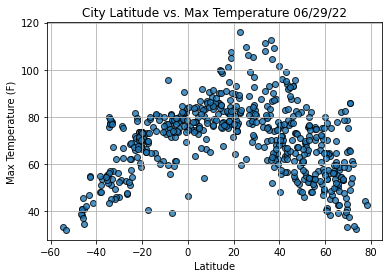

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()